<a href="https://colab.research.google.com/github/msdnarayan/Data-Science-Nissan-/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


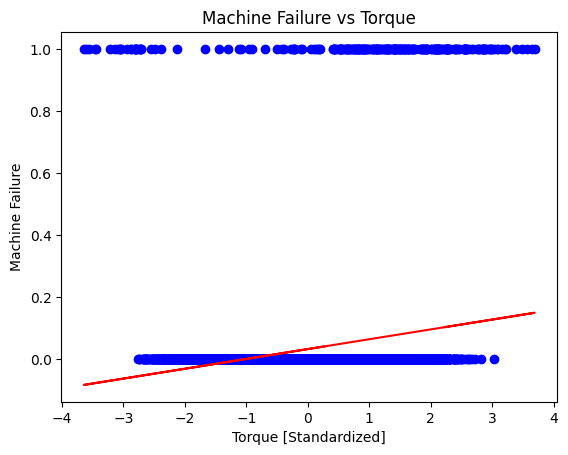

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/machine_failure.csv')

# Select relevant columns for the regression
selected_columns = data[["Torque [Nm]", "Machine failure"]]

# Split the data into features (X) and target variable (y)
X = selected_columns[["Torque [Nm]"]]
y = selected_columns["Machine failure"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)

# Visualize the results (if needed)
plt.scatter(X_train_scaled, y_train, color='blue')
plt.plot(X_train_scaled, lr.predict(X_train_scaled), color='red')
plt.title("Machine Failure vs Torque")
plt.xlabel("Torque [Standardized]")
plt.ylabel("Machine Failure")
plt.show()



Mean Squared Error: 0.0025
Mean Absolute Error: 0.0025
R2 Score: 0.9154541380972109


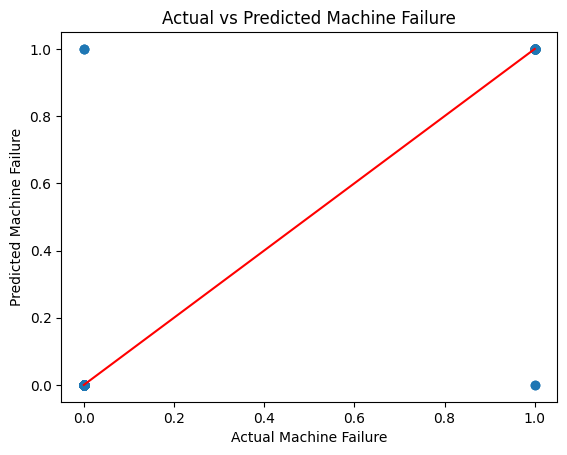

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/machine_failure.csv')

# Select the columns
X = data.drop(['Machine failure', 'UDI', 'Product ID', 'Type'], axis=1)
y = data['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# Plotting
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Machine Failure')
plt.ylabel('Predicted Machine Failure')
plt.title('Actual vs Predicted Machine Failure')
plt.show()


Mean Squared Error: 0.0011989999999999998
Mean Absolute Error: 0.0028399999999999996
R2 Score: 0.9594518046314223


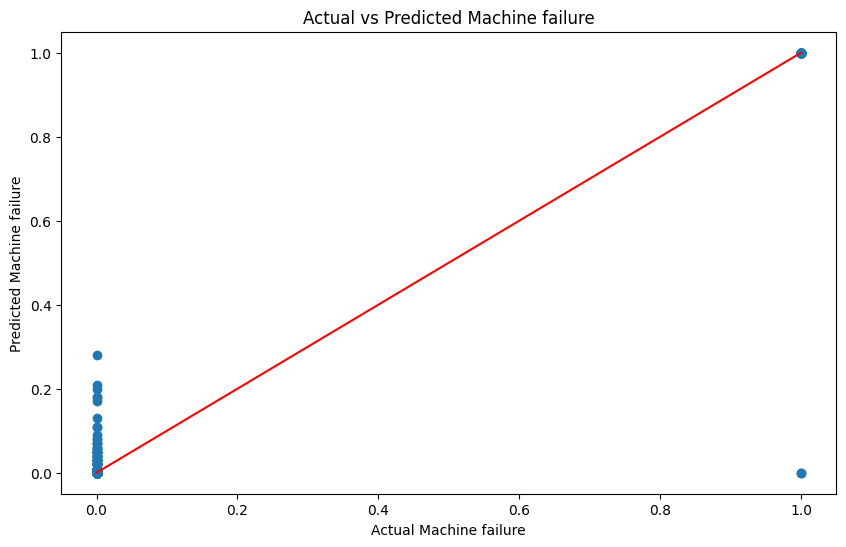

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/machine_failure.csv')

# For simplicity, let's drop 'UDI' and 'Product ID' columns
data.drop(['UDI', 'Product ID'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Type'])

# Define features and target variable
X = data.drop(['Machine failure'], axis=1)
y = data['Machine failure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Machine failure')
plt.ylabel('Predicted Machine failure')
plt.title('Actual vs Predicted Machine failure')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/machine_failure.csv')

# Drop unnecessary columns
data = data.drop(['UDI', 'Product ID', 'Type'], axis=1)

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features (X) and target variable (y)
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_scaled, y)

# Example data for prediction
example = pd.DataFrame({
    'Air temperature [K]': [300],
    'Process temperature [K]': [310],
    'Rotational speed [rpm]': [1500],
    'Torque [Nm]': [40],
    'Tool wear [min]': [10],
    'TWF': [0],
    'HDF': [0],
    'PWF': [0],
    'OSF': [0],
    'RNF': [0]
})

# Standardize the example data
example_scaled = scaler.transform(example)

# Predict machine failure
failure_prediction = knn_model.predict(example_scaled)

# Output prediction
if failure_prediction[0] == 0:
    print("The machine is predicted to not fail.")
else:
    print("The machine is predicted to fail.")


The machine is predicted to not fail.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/machine_failure.csv')

# Drop unnecessary columns
data = data.drop(['UDI', 'Product ID', 'Type'], axis=1)

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features (X) and target variable (y)
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_model = SVC(kernel='linear', random_state=0)
svm_model.fit(X_train_scaled, y_train)

# Predict machine failure
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example data for prediction
example = pd.DataFrame({
    'Air temperature [K]': [300],
    'Process temperature [K]': [310],
    'Rotational speed [rpm]': [1500],
    'Torque [Nm]': [40],
    'Tool wear [min]': [10],
    'TWF': [0],
    'HDF': [0],
    'PWF': [0],
    'OSF': [0],
    'RNF': [0]
})

# Standardize the example data
example_scaled = scaler.transform(example)

# Predict machine failure for the example data
failure_prediction = svm_model.predict(example_scaled)

# Output prediction
if failure_prediction[0] == 0:
    print("The machine is predicted to not fail.")
else:
    print("The machine is predicted to fail.")


Accuracy: 0.9975
The machine is predicted to not fail.
